# Sense Function

In this notebook, let's go over the steps a robot takes to help localize itself from an initial, uniform distribution to sensing and updating that distribution.

You know these steps well, and this time, you're tasked with writing a function `sense` that encompasses this behavior. 

1. The robot starts off knowing nothing; the robot is equally likely to be anywhere and so `p` is a uniform distribution.
2. Then the robot senses a grid color: red or green, and updates this distribution `p` according to the values of pHit and pMiss.

* The probability that it is sensing the color correctly is `pHit = 0.6`.
* The probability that it is sensing the wrong color is `pMiss = 0.2`

<img src='images/robot_sensing.png' width=50% height=50% />


In [1]:
import matplotlib.pyplot as plt
import numpy as np

A helper function for visualizing a distribution.

In [2]:
def display_map(grid, bar_width=1):
    if(len(grid) > 0):
        x_labels = range(len(grid))
        plt.bar(x_labels, height=grid, width=bar_width, color='b')
        plt.xlabel('Grid Cell')
        plt.ylabel('Probability')
        plt.ylim(0, 1) # range of 0-1 for probability values 
        plt.title('Probability of the robot being at each cell in the grid')
        plt.xticks(np.arange(min(x_labels), max(x_labels)+1, 1))
        plt.show()
    else:
        print('Grid is empty')

### QUIZ: Complete the sense function so that this outputs an unnormalized distribution, `p`, after sensing. 

Use the previous exercise as a starting point. `q = [0.04, 0.12, 0.12, 0.04, 0.04]` should be exactly the distribution you get when the sensor measurement `Z= 'red'`. 

This complete function should also output the correct `q` for `Z= 'green'`.

Note that `pHit` refers to the probability that the robot correctly senses the color of the square it is on, so if a robot senses red *and* is on a red square, we'll multiply the current location probability (0.2) with pHit. Same goes for if a robot senses green *and* is on a green square.

[0.04000000000000001, 0.12, 0.12, 0.04000000000000001, 0.04000000000000001]


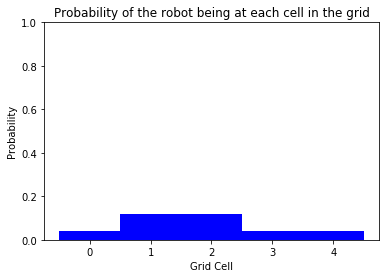

In [4]:
# given initial variables
p=[0.2, 0.2, 0.2, 0.2, 0.2]
# the color of each grid cell in the 1D world
world=['green', 'red', 'red', 'green', 'green']
# Z, the sensor reading ('red' or 'green')
Z = 'red'
pHit = 0.6
pMiss = 0.2

## Complete this function
def sense(p, Z):
    ''' Takes in a current probability distribution, p, and a sensor reading, Z.
        Returns an unnormalized distribution after the sensor measurement has been made, q.
        This should be accurate whether Z is 'red' or 'green'. '''
        
    q = [pHit*p[i] if world[i] == Z else pMiss*p[i] for i in range(len(p))]
    return q

q = sense(p,Z)
print(q)
display_map(q)